In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder

In [2]:
# Dataset
from ucimlrepo import fetch_ucirepo 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

In [3]:
# Basic EDA
print(X.describe())
print(X.info())
print(y.value_counts())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [4]:
if not os.path.exists('EDA_visualizations'):
    os.makedirs('EDA_visualizations')

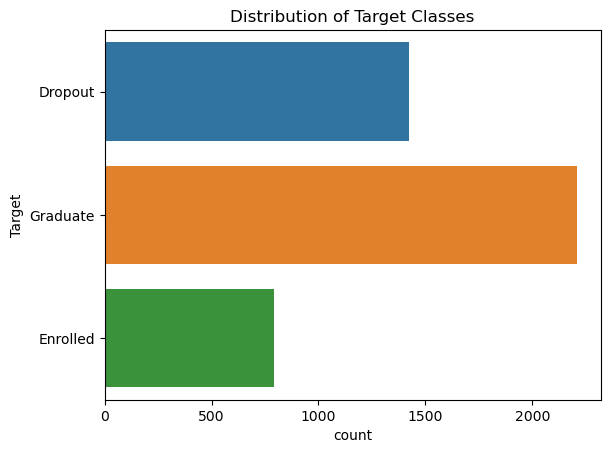

In [5]:
# Distribution of Target Classes
sns.countplot(y='Target', data=y)
plt.title('Distribution of Target Classes')
plt.savefig(f'EDA_visualizations/1Target_Class.png')
plt.show()

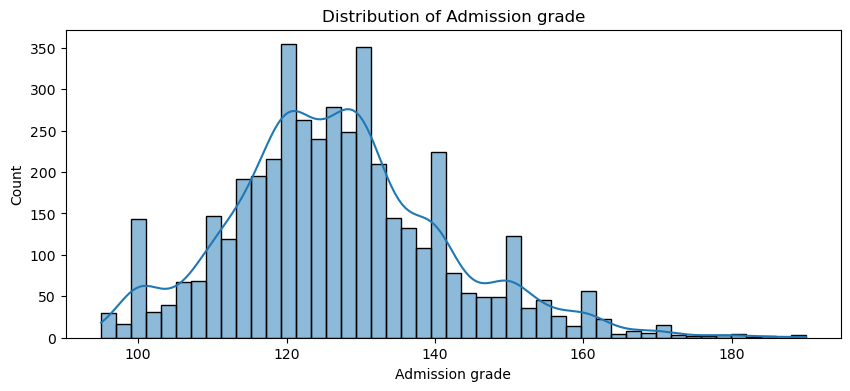

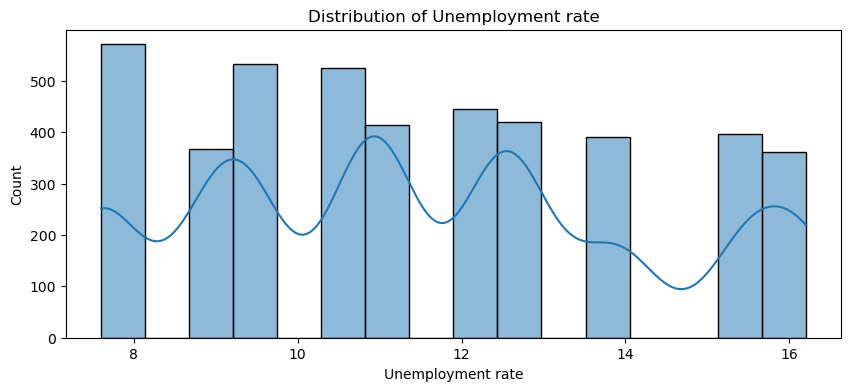

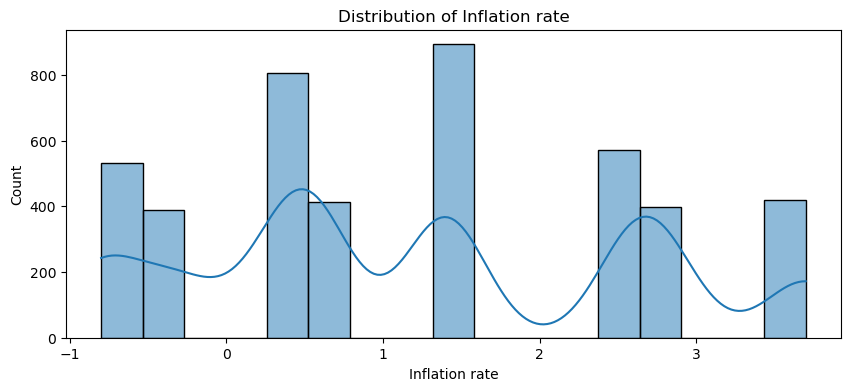

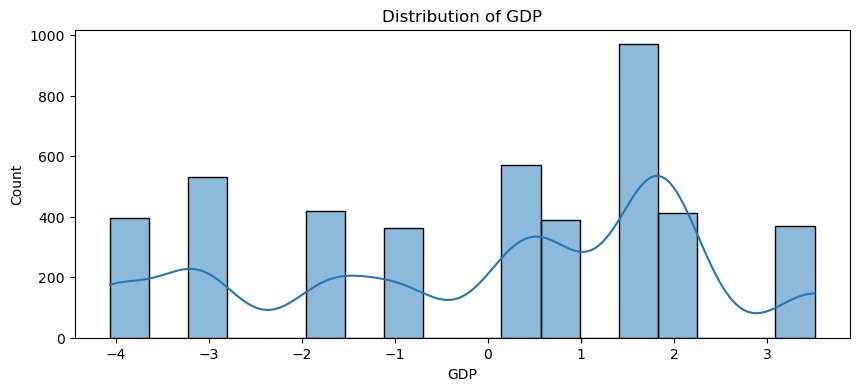

In [7]:
# Distribution of Numerical Features

numerical_features = ['Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'EDA_visualizations/distribution_{feature}.png')
    plt.show()

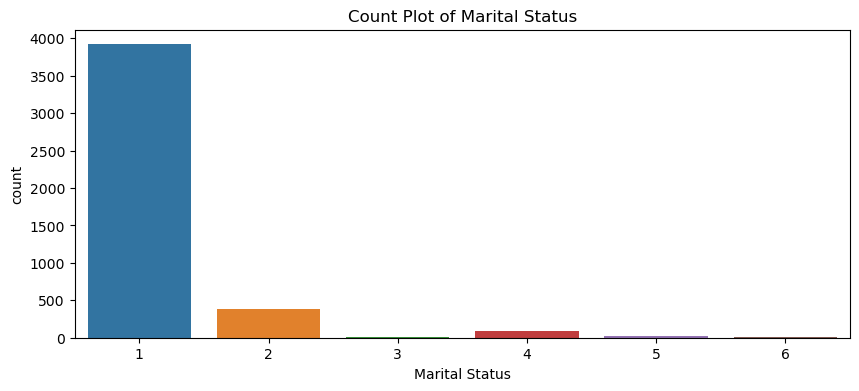

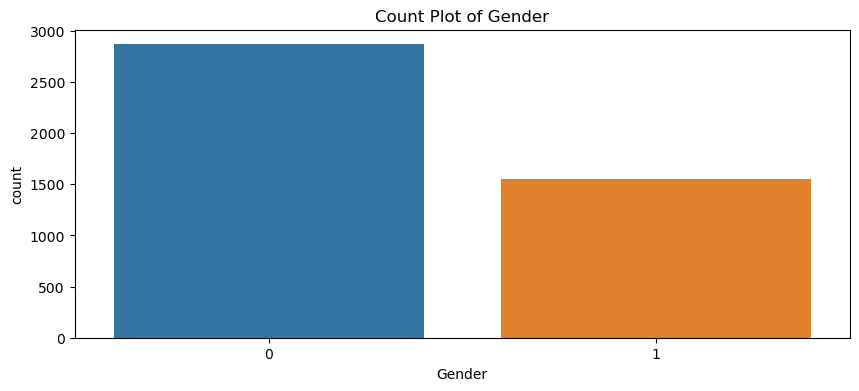

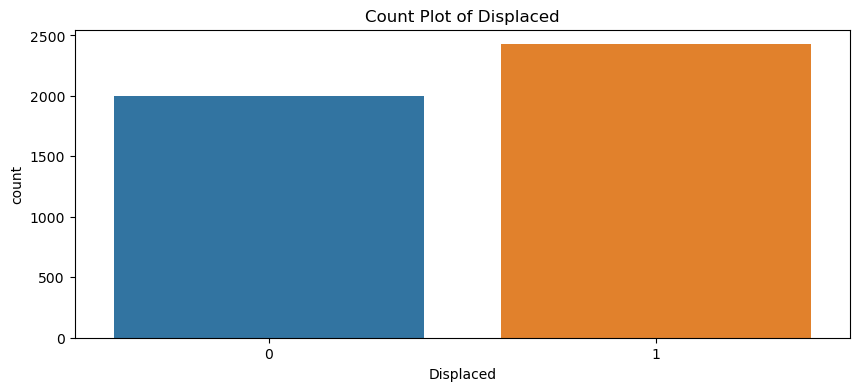

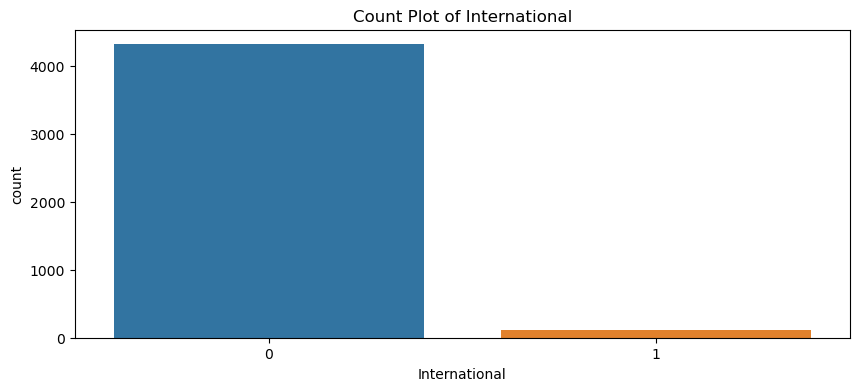

In [8]:
# Count Plots for Categorical Features

categorical_features = ['Marital Status', 'Gender', 'Displaced', 'International']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=X[feature])
    plt.title(f'Count Plot of {feature}')
    plt.savefig(f'EDA_visualizations/countplot_{feature}.png')
    plt.show()

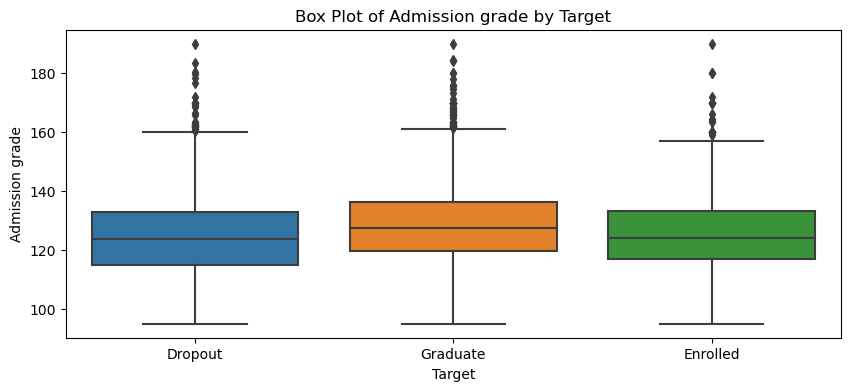

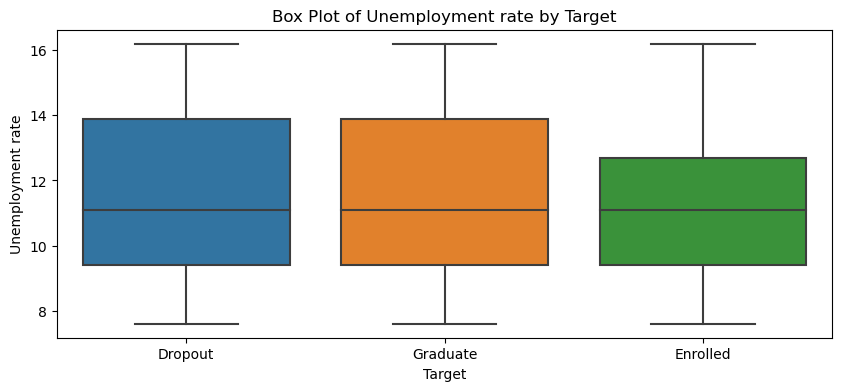

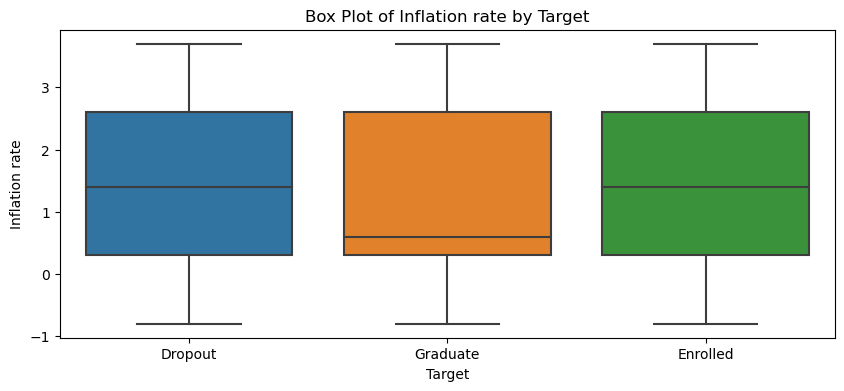

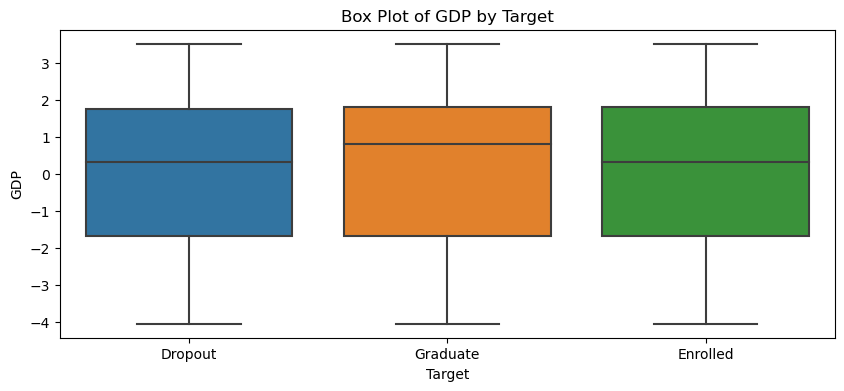

In [9]:
# Box Plots
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=y.squeeze(), y=X[feature])  # Using squeeze() to ensure y is 1D
    plt.title(f'Box Plot of {feature} by Target')
    plt.savefig(f'EDA_visualizations/boxplot_{feature}.png')
    plt.show()

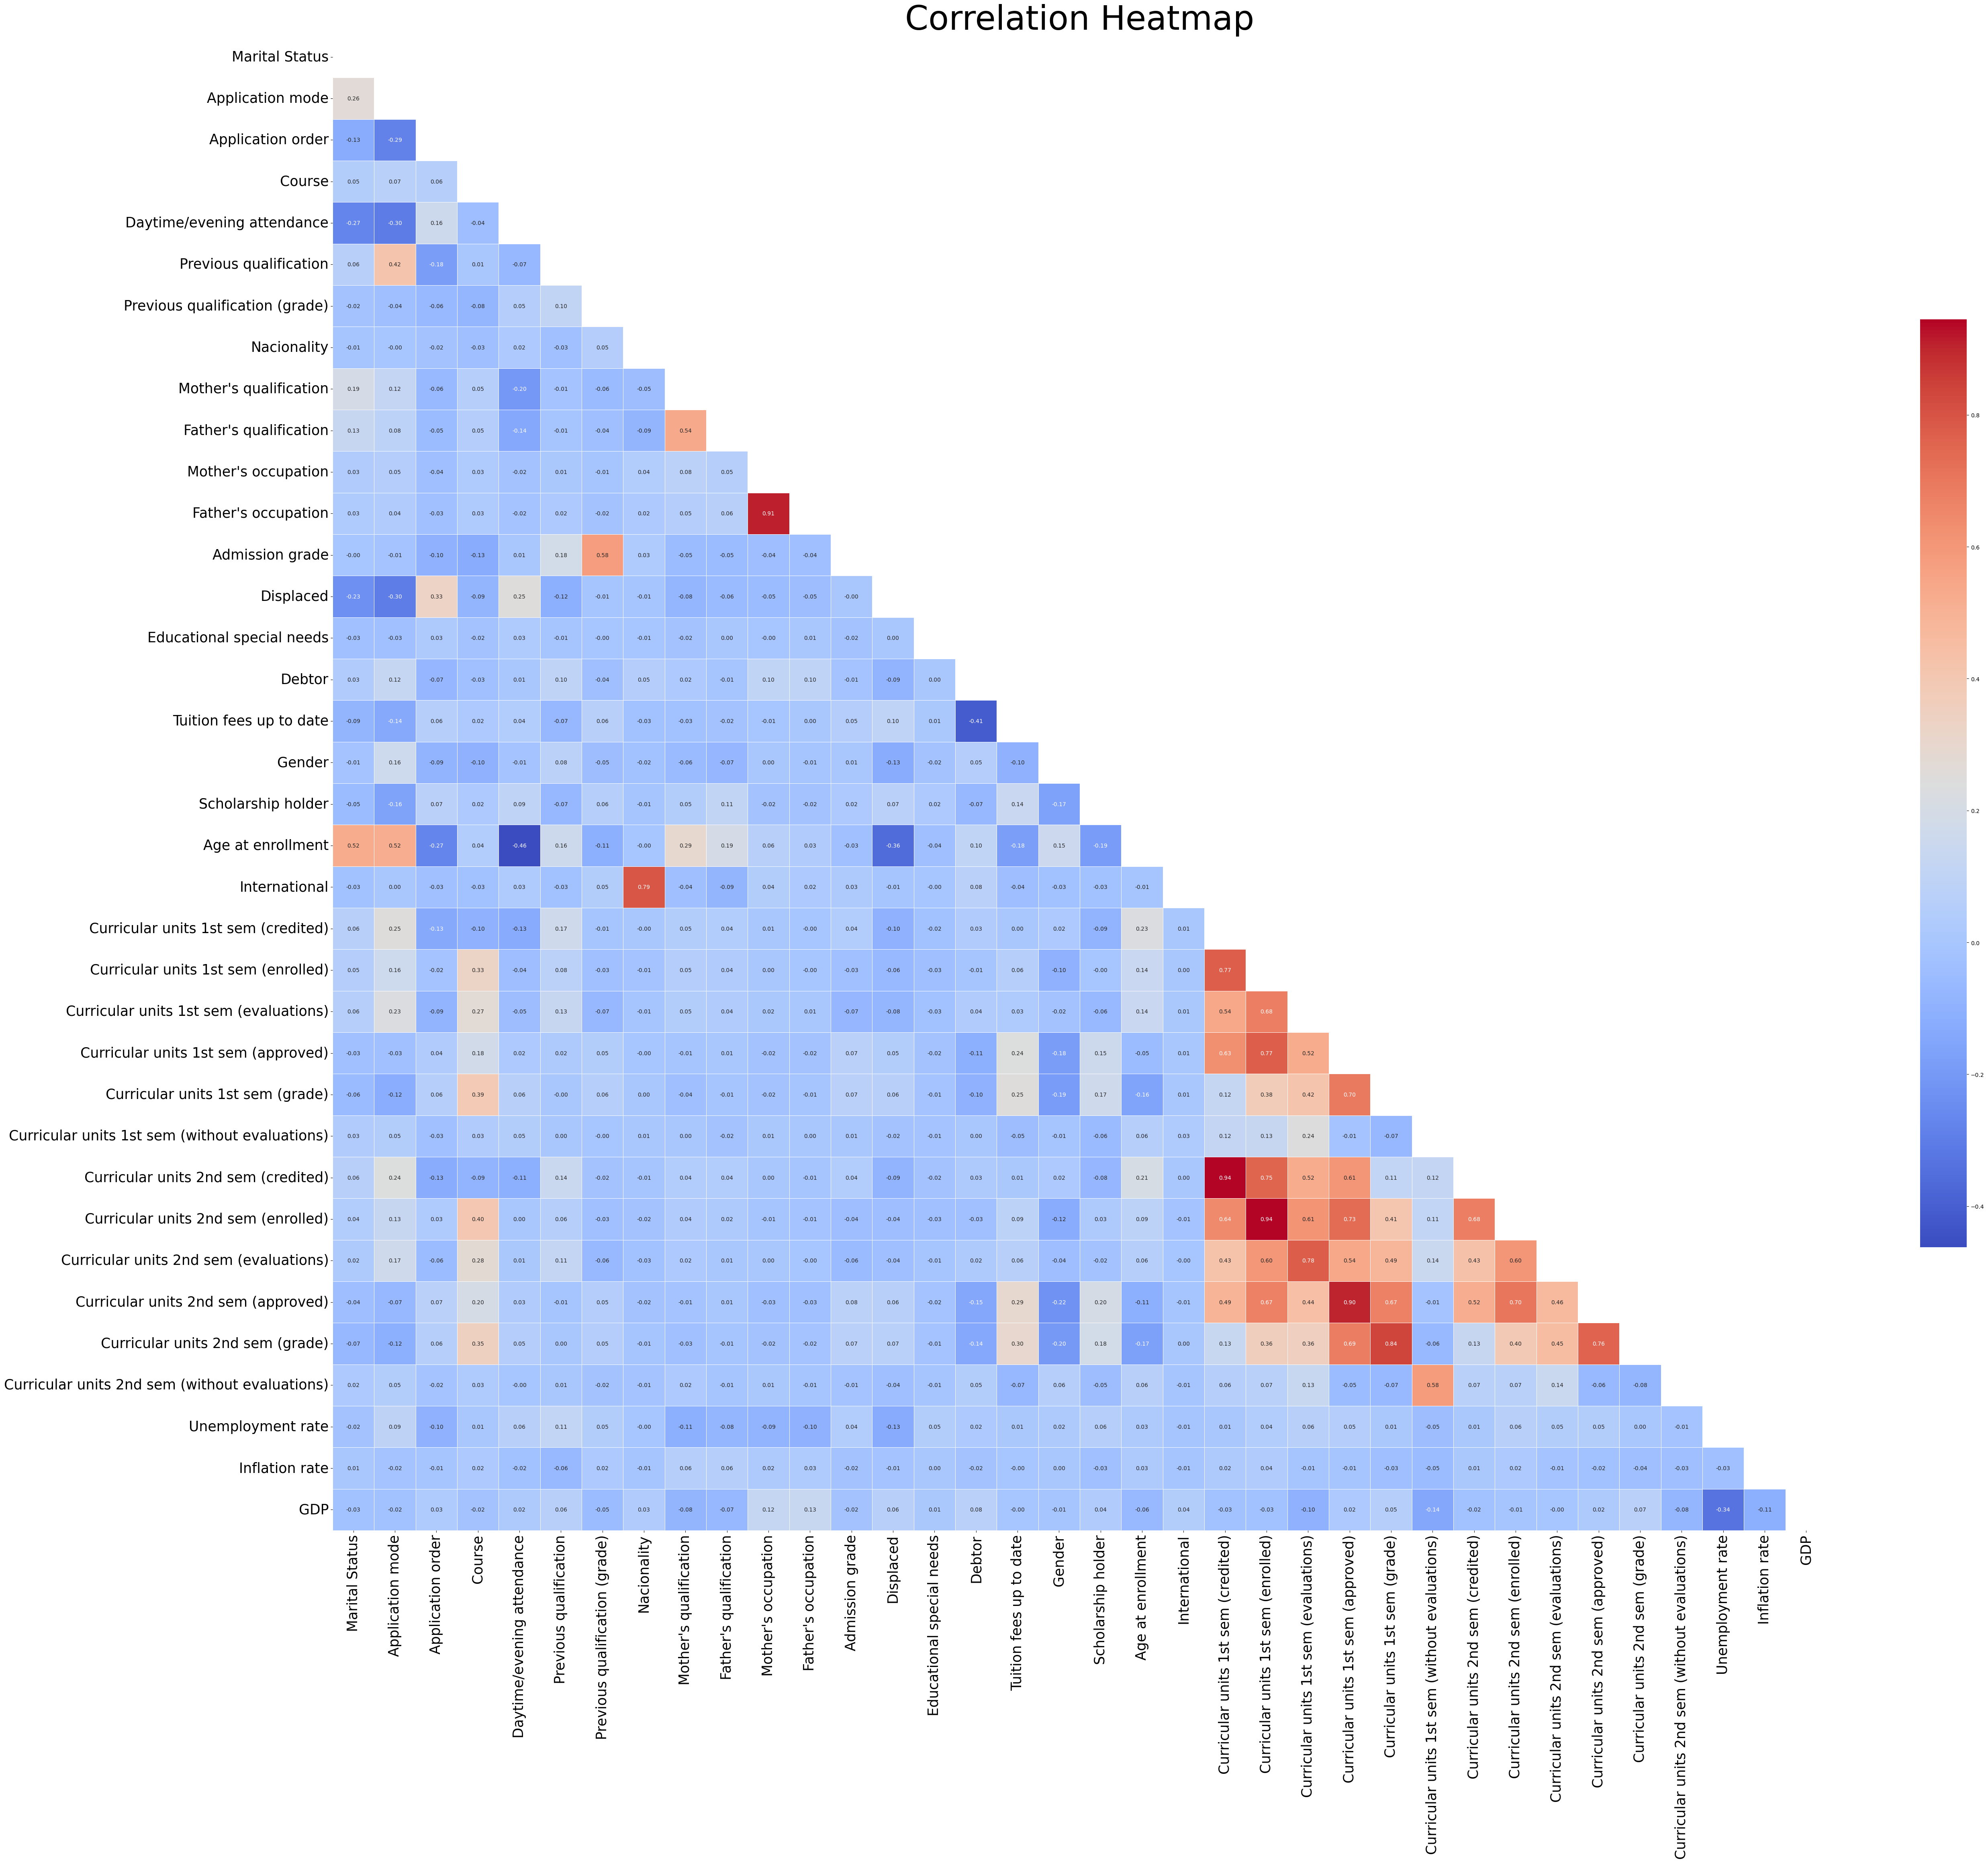

In [11]:
# Correlation Heatmap
plt.figure(figsize=(60, 60))
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Correlation Heatmap', fontsize=60)
plt.savefig('EDA_visualizations/correlation_heatmap.png')
plt.show()

In [12]:
print(corr)

                                                Marital Status  \
Marital Status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance                           -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educationa

In [33]:
# Correlation with Target added:

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
X['Target'] = y_encoded
correlation_matrix = X.corr()
target_correlations = correlation_matrix['Target']
sorted_target_correlations = target_correlations.sort_values(key=abs, ascending=False)
print(sorted_target_correlations)
# X.drop('Target', axis=1, inplace=True)

/Users/abraar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Length of values (4424) does not match length of index (3)

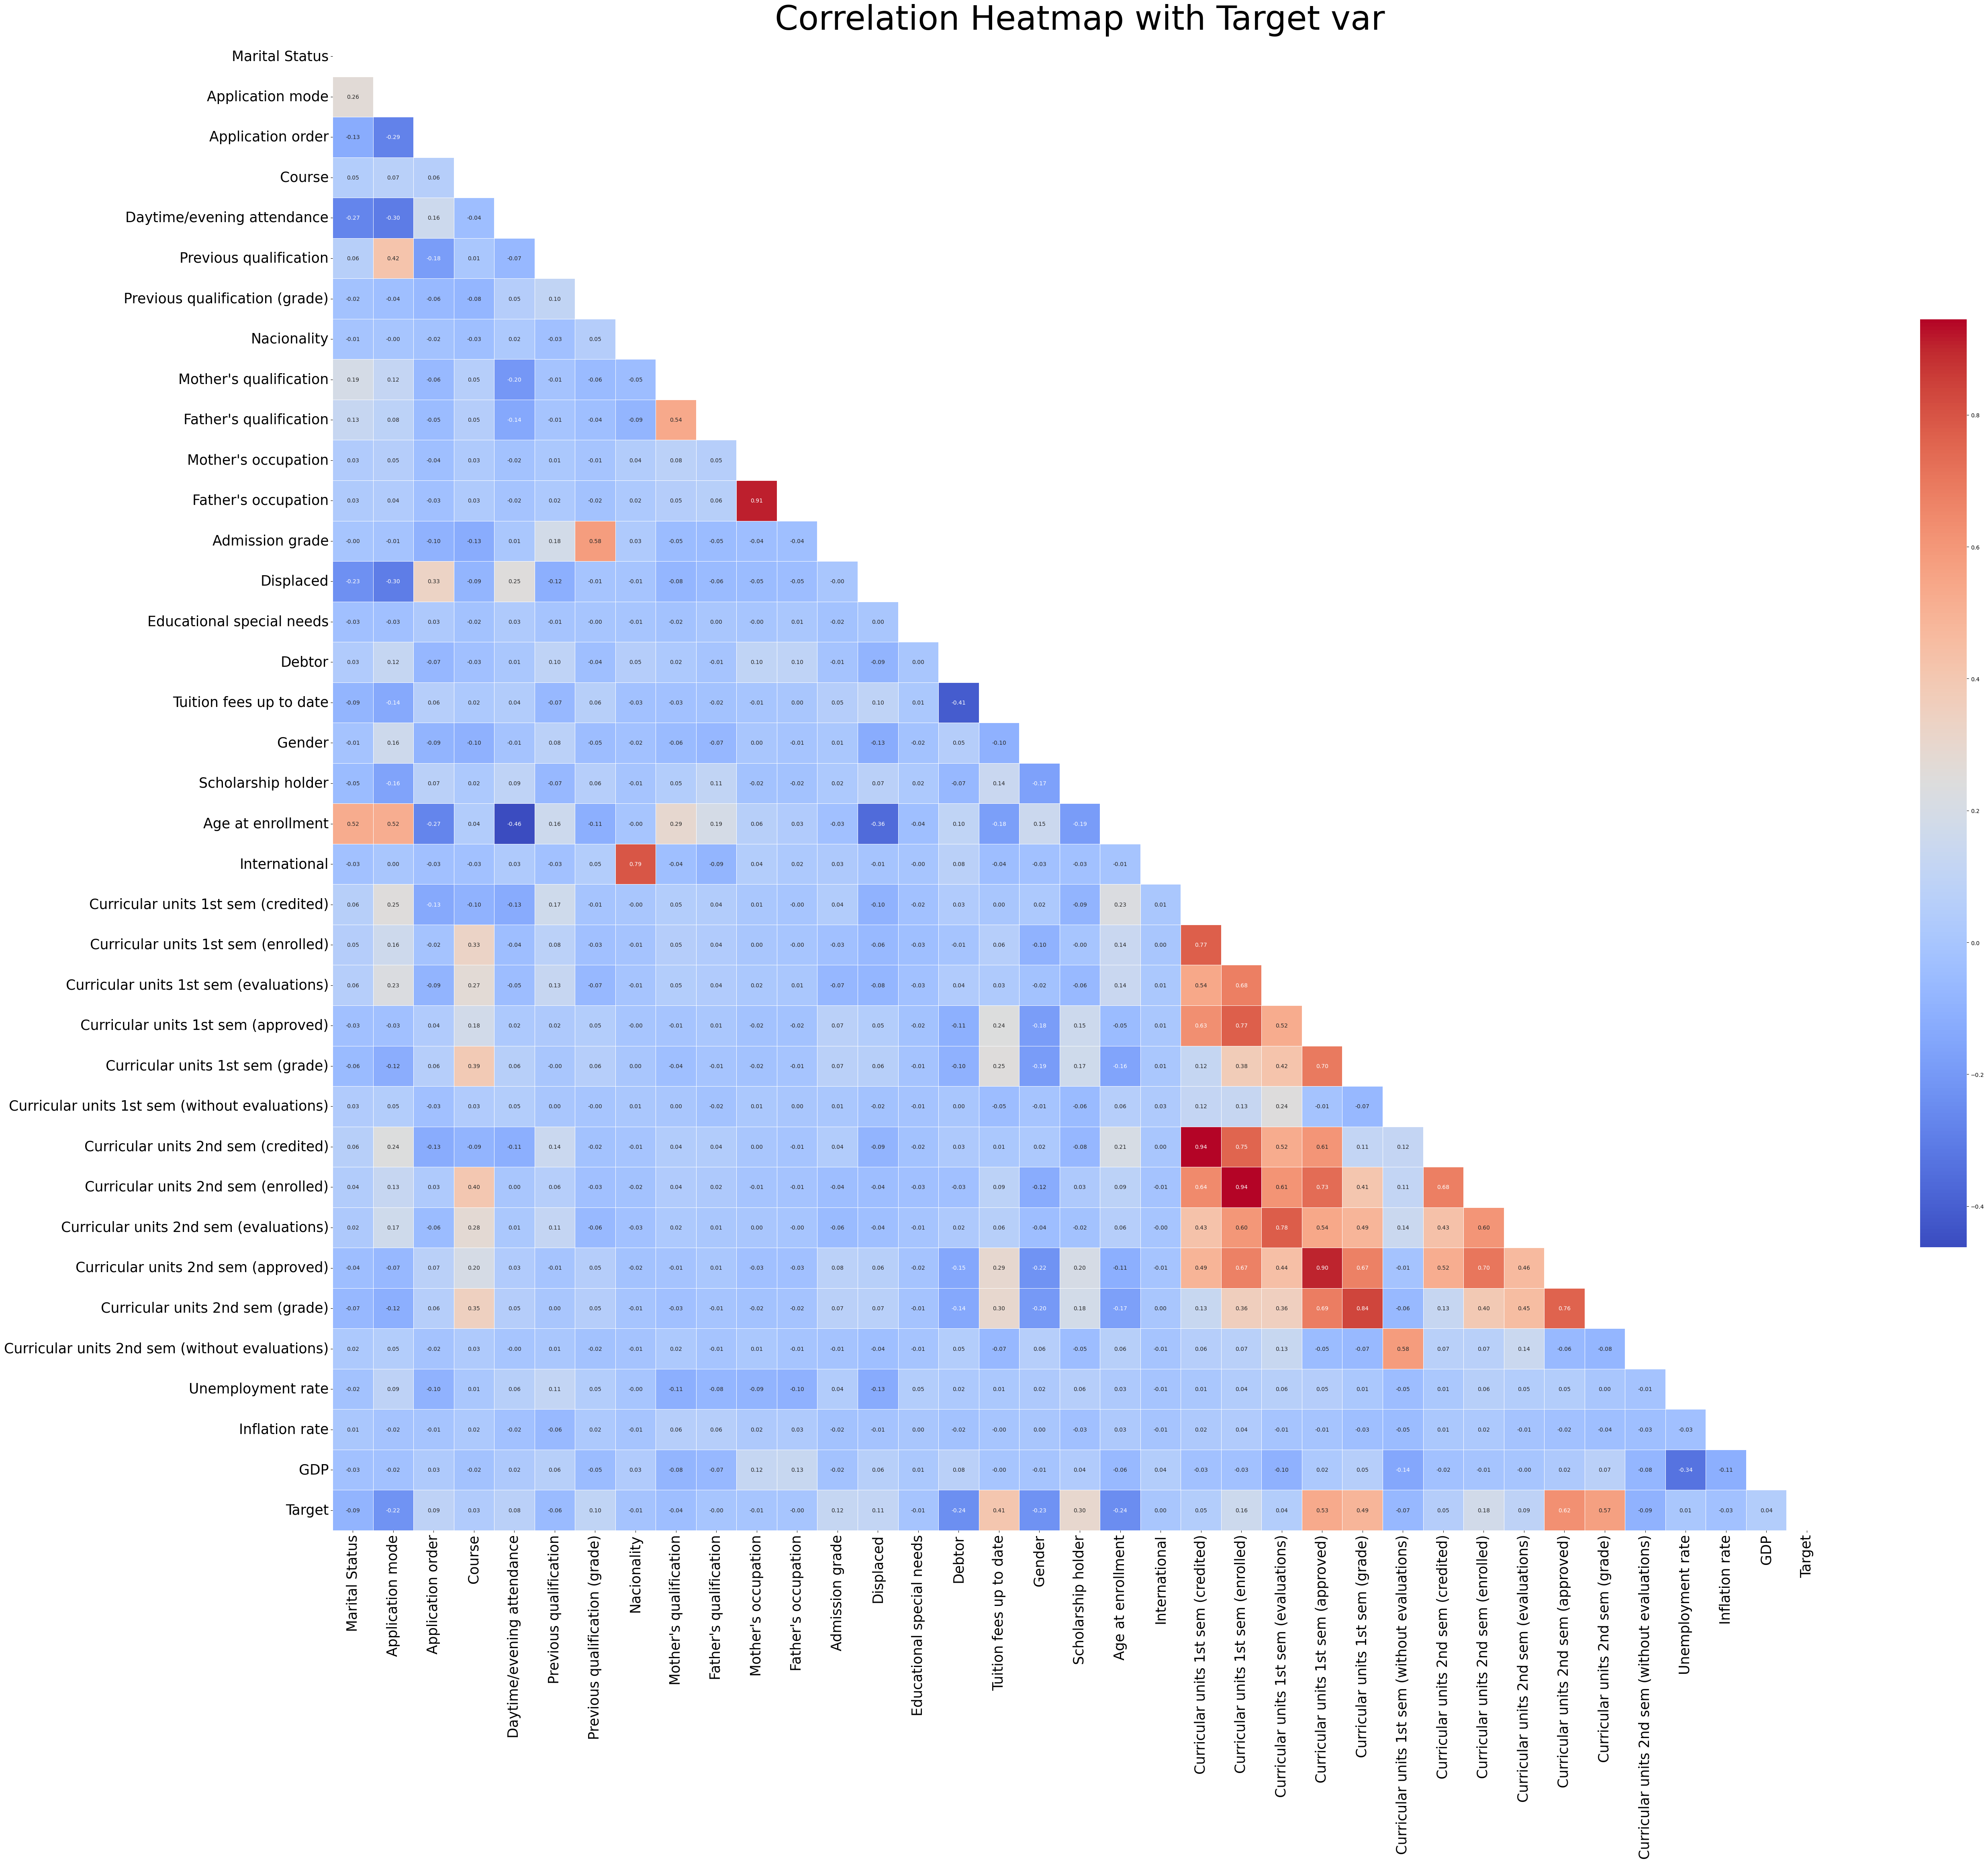

In [34]:

plt.figure(figsize=(60, 60))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Correlation Heatmap with Target var', fontsize=60)
plt.savefig('EDA_visualizations/correlation_heatmap_w_target.png')
plt.show()


## Correlation Analysis with Target Variable

The correlation analysis between feature variables and the target variable revealed several significant relationships:

### Strong Positive Correlations
- `Curricular units 2nd sem (approved)`: Positive correlation (r = 0.624157) suggests a strong relationship where students with a higher number of approved curricular units in the second semester are more likely to have a positive outcome.
- `Curricular units 2nd sem (grade)`: Positive correlation (r = 0.566827) indicates that students with higher grades in the second semester are more likely to have a positive outcome.
- `Curricular units 1st sem (approved)`: Positive correlation (r = 0.529123) also points to a similar trend as with second-semester approvals.
- `Curricular units 1st sem (grade)`: Positive correlation (r = 0.485207) demonstrates the importance of first-semester grades in predicting the target variable.

### Strong Negative Correlations
- `Age at enrollment`: Negative correlation (r = -0.243438) suggests that older students at the time of enrollment may have a lower likelihood of a positive outcome.
- `Debtor`: Negative correlation (r = -0.240999) indicates that students with outstanding debts are less likely to achieve a positive outcome.
- `Gender`: Negative correlation (r = -0.229270) may reflect that the gender of students could have an impact on the target variable, with the coding of gender needing clarification for interpretation.
- `Application mode`: Negative correlation (r = -0.221747) suggests that the mode of application could influence student outcomes.

### Other Notable Correlations
- `Tuition fees up to date`: Positive correlation (r = 0.409827) implies that students who are current with their tuition payments are more likely to have a positive outcome.
- `Scholarship holder`: Positive correlation (r = 0.297595) suggests that receiving a scholarship is associated with a positive outcome.

### Minimal or No Correlation
Several features showed minimal or no linear correlation with the target variable, indicating that they might not be significant predictors in the context of the other features.

These results highlight the importance of academic performance indicators such as curricular unit approvals and grades in predicting student success. Financial factors such as being a debtor or staying current with tuition fees also play a significant role. Demographic and enrollment characteristics such as age, gender, and application mode require further investigation to understand their impact on student outcomes.


# DONE WITH EDA FOR NOW
---

# Feature Engineering

In [35]:
data = {
    'Curricular units 1st sem (approved)': [3, 4, 5],
    'Curricular units 1st sem (enrolled)': [5, 5, 5],
    'Curricular units 2nd sem (approved)': [2, 3, 4],
    'Curricular units 2nd sem (enrolled)': [5, 5, 5],
    'Age at enrollment': [18, 25, 35],
    'Debtor': [0, 1, 0],
    'Tuition fees up to date': [1, 0, 1],
    'Scholarship holder': [0, 1, 0],
    'Previous qualification (grade)': [150, 120, 180]
}
X = pd.DataFrame(data)

# Ratio features
X['Approval rate 1st sem'] = X['Curricular units 1st sem (approved)'] / X['Curricular units 1st sem (enrolled)']
X['Approval rate 2nd sem'] = X['Curricular units 2nd sem (approved)'] / X['Curricular units 2nd sem (enrolled)']

# Binned age groups
X['Binned age'] = pd.cut(X['Age at enrollment'], bins=[0, 20, 30, 40, float('inf')], labels=['Under 20', '20-30', '31-40', 'Over 40'])

# Interaction features
X['1st and 2nd sem approved interaction'] = X['Curricular units 1st sem (approved)'] * X['Curricular units 2nd sem (approved)']

# Financial Stability Index
X['Financial Stability Index'] = X['Tuition fees up to date'] - X['Debtor'] + X['Scholarship holder']

# Normalized previous qualification grade
max_grade = X['Previous qualification (grade)'].max()
X['Normalized Previous qualification (grade)'] = X['Previous qualification (grade)'] / max_grade

In [36]:
# Create the directory if it doesn't exist
if not os.path.exists('EDA_visualizations_w_Feature_Engineering'):
    os.makedirs('EDA_visualizations_w_Feature_Engineering')

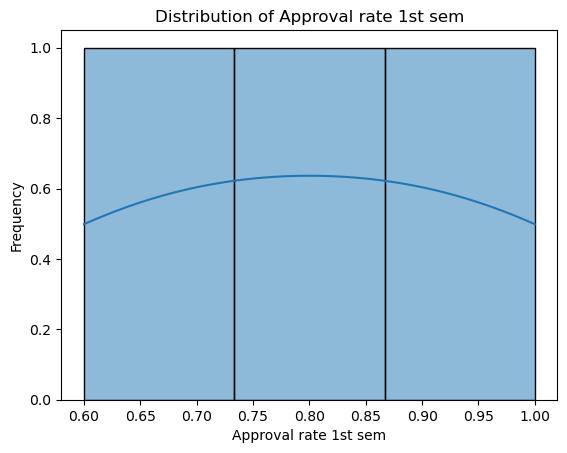

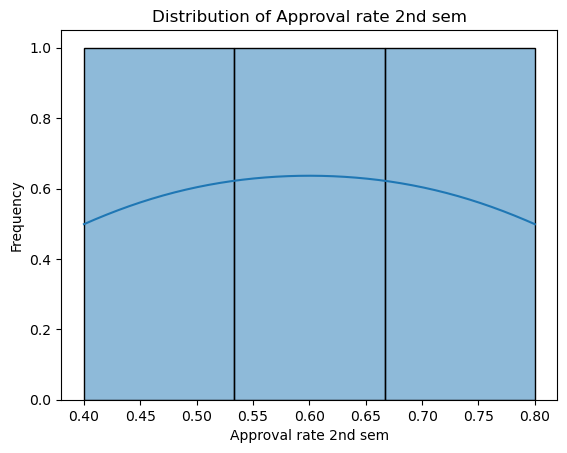

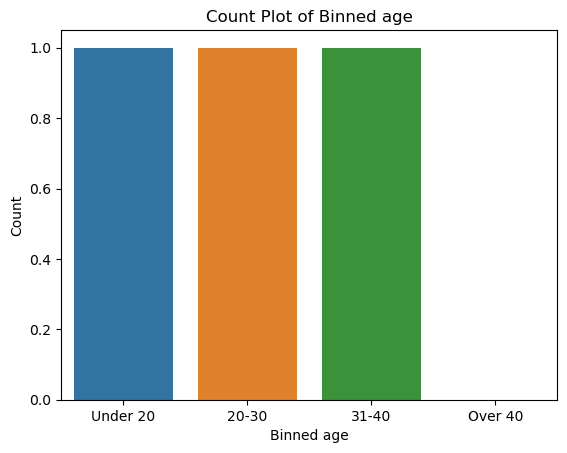

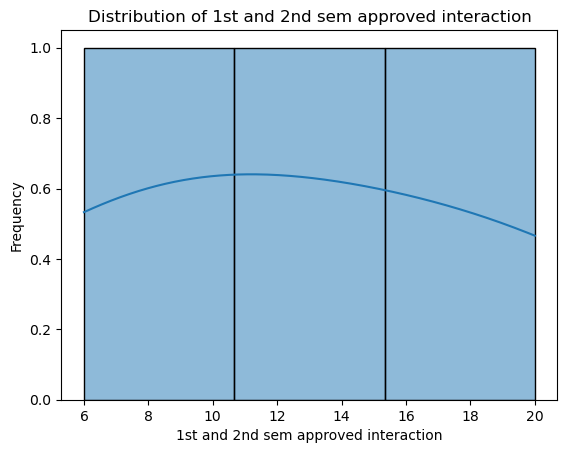

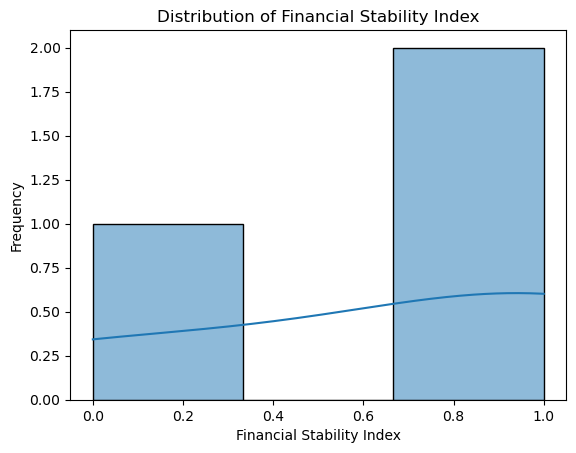

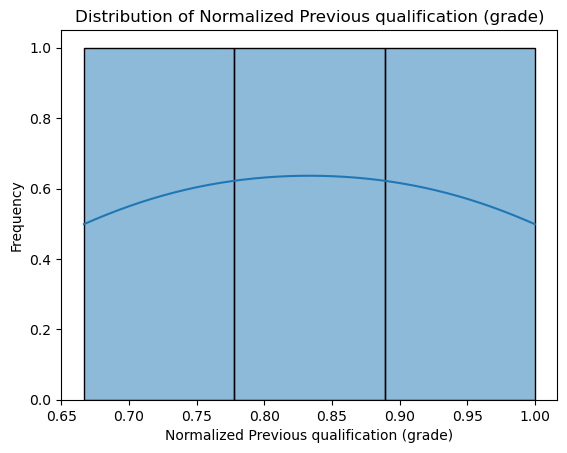

Correlation with Target:
 Binned age_20-30                             1.000000e+00
0                                            1.000000e+00
Approval rate 1st sem                        3.204938e-17
Approval rate 2nd sem                       -2.083210e-16
1st and 2nd sem approved interaction        -8.219949e-02
Binned age_Under 20                         -5.000000e-01
Binned age_31-40                            -5.000000e-01
Normalized Previous qualification (grade)   -8.660254e-01
Financial Stability Index                   -1.000000e+00
Binned age_Over 40                                    NaN
Name: 0, dtype: float64


/Users/abraar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


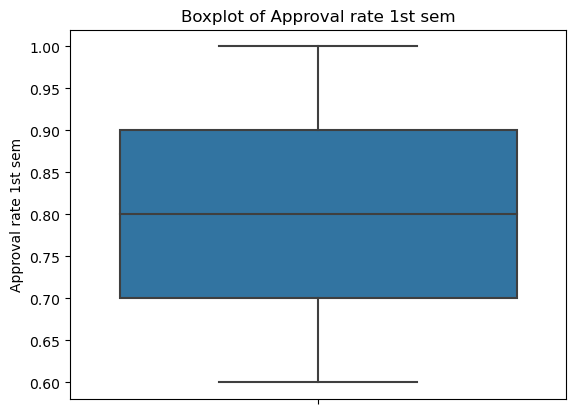

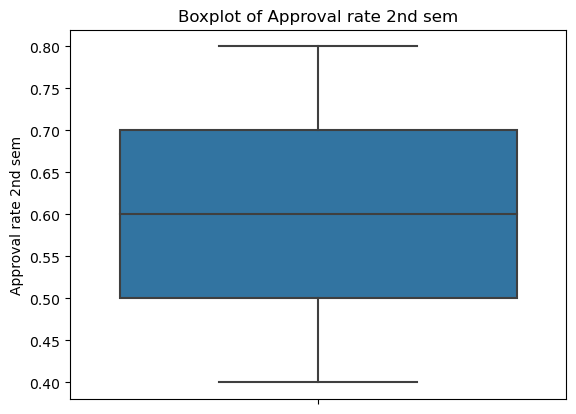

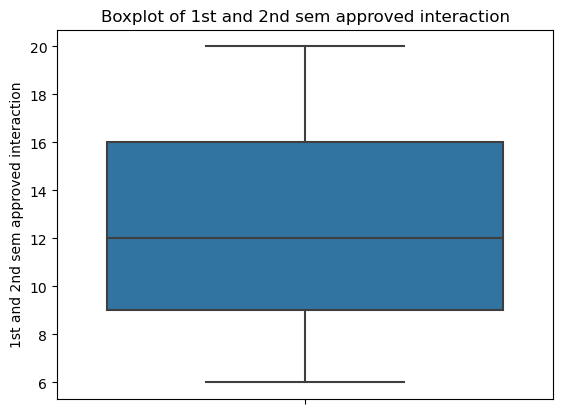

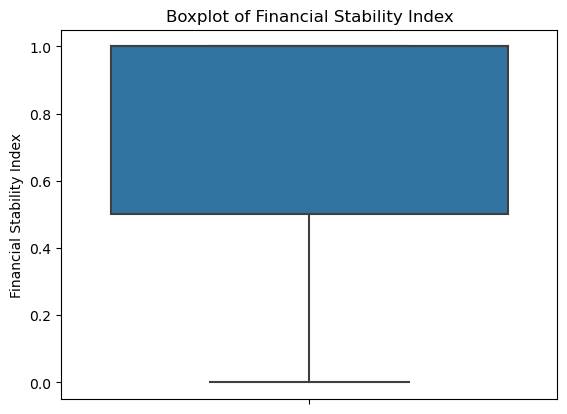

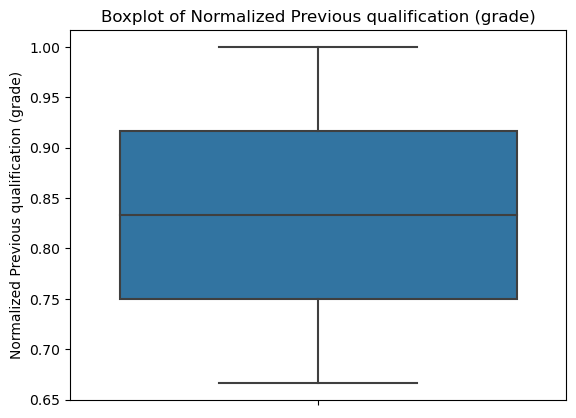

In [43]:
# Follow up EDA with new fwtures

# List of new feature names
new_features = [
    'Approval rate 1st sem', 
    'Approval rate 2nd sem', 
    'Binned age', 
    '1st and 2nd sem approved interaction', 
    'Financial Stability Index', 
    'Normalized Previous qualification (grade)'
]

# Histograms/Density Plots for Distribution Analysis
for feature in new_features:
    if X[feature].dtype == 'float64' or X[feature].dtype == 'int64':  # For continuous variables
        sns.histplot(X[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/distribution_{feature}.png')
        plt.show()
    elif X[feature].dtype.name == 'category':  # For categorical variables
        sns.countplot(x=feature, data=X)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.savefig(f'EDA_visualizations_w_Feature_Engineering/countplot_{feature}.png')
        plt.show()

# Correlation Analysis with the target

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_series = pd.Series(y_encoded)
X_encoded = pd.get_dummies(X, columns=['Binned age']) # For categorical features in X

new_features = [feature for feature in new_features if feature != 'Binned age']
new_features.extend([col for col in X_encoded.columns if 'Binned age' in col])

# Now recalculate correlation with the numerically encoded target
correlation_with_target = pd.concat([X_encoded[new_features], y_series], axis=1).corr().iloc[-1].sort_values(ascending=False)
print("Correlation with Target:\n", correlation_with_target)

# Boxplots for Outlier Detection
for feature in new_features:
    # Check if the feature is in the encoded DataFrame X_encoded
    if feature in X_encoded.columns:
        # Determine the data type of the feature in X_encoded
        if X_encoded[feature].dtype == 'float64' or X_encoded[feature].dtype == 'int64':  # For continuous variables
            sns.boxplot(y=X_encoded[feature])
            plt.title(f'Boxplot of {feature}')
            plt.ylabel(feature)
            plt.savefig(f'EDA_visualizations_w_Feature_Engineering/boxplot_{feature}.png')
            plt.show()

### Splitting Data

In [44]:
from sklearn.model_selection import train_test_split

X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Code to display the shapes of the resulting datasets
print("Training set (X_train):", X_train.shape)
print("Test set (X_test):", X_test.shape)
print("Training target (y_train):", y_train.shape)
print("Test target (y_test):", y_test.shape)


Training set (X_train): (3539, 36)
Test set (X_test): (885, 36)
Training target (y_train): (3539, 1)
Test target (y_test): (885, 1)


## Logistic Regression Model - 1

In [47]:
from sklearn.preprocessing import StandardScaler

# Data scaling (Optional)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y_train and y_test to be 1D arrays
y_train_reshaped = y_train.values.ravel()
y_test_reshaped = y_test.values.ravel()

# Initialize the Logistic Regression model with increased max_iter
logreg_adjusted = LogisticRegression(max_iter=1000)

# Fit the model to the scaled and reshaped training data
logreg_adjusted.fit(X_train_scaled, y_train_reshaped)

# Predictions on the scaled test set
y_pred_adjusted = logreg_adjusted.predict(X_test_scaled)

# Evaluate the adjusted model
accuracy_adjusted = accuracy_score(y_test_reshaped, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test_reshaped, y_pred_adjusted)

# Display the evaluation metrics for the adjusted model
print("Adjusted Accuracy:", accuracy_adjusted)
print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)


Adjusted Accuracy: 0.752542372881356
Adjusted Confusion Matrix:
 [[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]


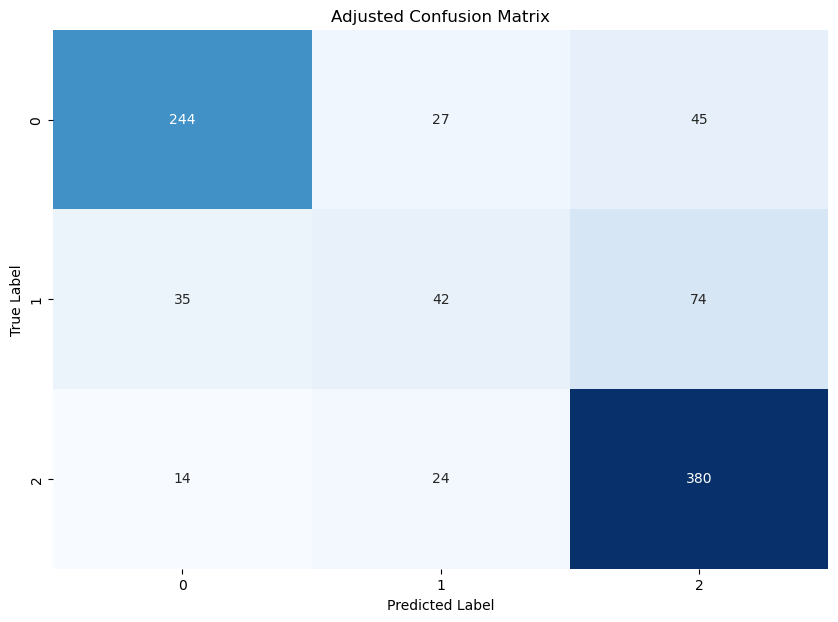

In [50]:
conf_matrix_adjusted_1 = [[244, 27, 45], [35, 42, 74], [14, 24, 380]]

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_adjusted_1, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Adjusted Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Additonal Evaluation of Model -1 (LR)

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test_reshaped, y_pred_adjusted, average='weighted')
recall = recall_score(y_test_reshaped, y_pred_adjusted, average='weighted')
f1 = f1_score(y_test_reshaped, y_pred_adjusted, average='weighted')
# Note: Replace 'weighted' with 'micro', 'macro'and tryy moree


# Print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification Report
class_report = classification_report(y_test_reshaped, y_pred_adjusted)
print("Classification Report:\n", class_report)


Precision: 0.7340833505891269
Recall: 0.752542372881356
F1-Score: 0.7363081777186452
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



In [53]:
from sklearn.preprocessing import label_binarize

# You need to binarize (one-hot encode) the actual target values
y_test_binarized = label_binarize(y_test_reshaped, classes=['Dropout', 'Enrolled', 'Graduate'])

# Get probability predictions for each class
y_proba = logreg_adjusted.predict_proba(X_test_scaled)

# ROC-AUC Score calculation
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8694260862515525



## Logistic Regression Model Evaluation

The Logistic Regression model was trained and evaluated on a student dataset to predict outcomes: Dropout, Enrolled, and Graduate. The model's performance was assessed using several metrics, providing a comprehensive view of its strengths and areas for improvement.

### Key Metrics:

- **ROC-AUC Score:** 0.869
    - Indicates excellent capability in distinguishing between the different classes.
- **Overall Accuracy:** 75.25%
    - Approximately three-quarters of the predictions made by the model are correct.

### Detailed Performance by Class (Classification Report):

- **Dropout:**
    - Precision: 0.83
    - Recall: 0.77
    - F1-Score: 0.80
    - The model performs well in identifying 'Dropout' cases with high precision and recall.
- **Enrolled:**
    - Precision: 0.45
    - Recall: 0.28
    - F1-Score: 0.34
    - The model shows challenges in accurately identifying 'Enrolled' cases, reflected in lower precision and recall.
- **Graduate:**
    - Precision: 0.76
    - Recall: 0.91
    - F1-Score: 0.83
    - Good performance in identifying 'Graduate' cases, especially in terms of recall.

### Overall Evaluation:

The model demonstrates strong performance in certain aspects, particularly in distinguishing between the classes (as evidenced by the high ROC-AUC score) and in identifying 'Dropout' and 'Graduate' cases. However, there is notable room for improvement in the 'Enrolled' category, where both precision and recall are comparatively lower. This could be indicative of potential issues such as class imbalance or insufficient feature representation for this category. 

# Model 2 : Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train_scaled, y_train_reshaped)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model using the same metrics as before
accuracy_rf = accuracy_score(y_test_reshaped, y_pred_rf)
precision_rf = precision_score(y_test_reshaped, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_reshaped, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_reshaped, y_pred_rf, average='weighted')
class_report_rf = classification_report(y_test_reshaped, y_pred_rf)

# ROC-AUC Score calculation for Random Forest
# For ROC-AUC, we need probability predictions for each class in multi-class classification
y_proba_rf = rf_classifier.predict_proba(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test_binarized, y_proba_rf, multi_class='ovr')

# Display the evaluation metrics for the Random Forest model
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)
print("Random Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)

# Note: Make sure y_test_reshaped and y_test_binarized are correctly provided.


Random Forest Accuracy: 0.7661016949152543
Random Forest Precision: 0.7505962721856216
Random Forest Recall: 0.7661016949152543
Random Forest F1-Score: 0.7495693944900833
Random Forest Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       316
    Enrolled       0.52      0.31      0.39       151
    Graduate       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

Random Forest ROC-AUC Score: 0.8698853419131565


## Random Forest Classifier Evaluation

The Random Forest Classifier was employed on the student dataset to predict outcomes: Dropout, Enrolled, and Graduate. The model's effectiveness was assessed using a comprehensive set of metrics, providing insights into its performance across various aspects.

### Key Metrics:

- **ROC-AUC Score:** 0.8699
    - Demonstrates the model's excellent capability in distinguishing between the classes.
- **Overall Accuracy:** 76.61%
    - Indicates that approximately 77% of the predictions made by the model are correct.

### Detailed Performance by Class (Classification Report):

- **Dropout:**
    - Precision: 0.83
    - Recall: 0.76
    - F1-Score: 0.79
    - Shows good performance in correctly identifying 'Dropout' cases.
- **Enrolled:**
    - Precision: 0.52
    - Recall: 0.31
    - F1-Score: 0.39
    - Indicates moderate performance in identifying 'Enrolled' cases, with room for improvement.
- **Graduate:**
    - Precision: 0.77
    - Recall: 0.94
    - F1-Score: 0.85
    - The model performs very well in identifying 'Graduate' cases, particularly in terms of recall.

### Overall Evaluation:

The Random Forest Classifier demonstrates a robust performance, with a particularly strong ability to distinguish between the classes, as evidenced by the high ROC-AUC score. The model performs well in predicting 'Dropout' and 'Graduate' categories but shows some limitations in accurately classifying 'Enrolled' cases. This discrepancy in performance across classes might be indicative of underlying complexities within the dataset, such as class imbalances or specific feature relationships.

### TODO:

- Investigate the model's lower performance in the 'Enrolled' category, potentially exploring class imbalance solutions or more targeted feature engineering.
- Experiment with hyperparameter tuning of the Random Forest model to refine its performance further.
- Continuous model evaluation and refinement are recommended, focusing on areas where the current model demonstrates weaknesses.


---
# MODEL 3 - DL (TF)
---

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# Assuming the original y_train and y_test are categorical and need to be encoded
# Encoding the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Building the Deep Learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print("Deep Learning Model Accuracy:", accuracy)

# Predictions for ROC-AUC calculation
y_pred_proba_dl = model.predict(X_test_scaled)
roc_auc_dl = roc_auc_score(y_test_categorical, y_pred_proba_dl)
print("Deep Learning Model ROC-AUC Score:", roc_auc_dl)


Epoch 1/10
89/89 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.6828 - val_loss: 0.6635 - val_accuracy: 0.7401
Epoch 2/10
89/89 [==============================] - 0s 777us/step - loss: 0.5984 - accuracy: 0.7651 - val_loss: 0.6185 - val_accuracy: 0.7458
Epoch 3/10
89/89 [==============================] - 0s 757us/step - loss: 0.5608 - accuracy: 0.7736 - val_loss: 0.6014 - val_accuracy: 0.7514
Epoch 4/10
89/89 [==============================] - 0s 787us/step - loss: 0.5371 - accuracy: 0.7803 - val_loss: 0.5952 - val_accuracy: 0.7542
Epoch 5/10
89/89 [==============================] - 0s 765us/step - loss: 0.5157 - accuracy: 0.7895 - val_loss: 0.5870 - val_accuracy: 0.7627
Epoch 6/10
89/89 [==============================] - 0s 783us/step - loss: 0.5010 - accuracy: 0.8032 - val_loss: 0.5836 - val_accuracy: 0.7641
Epoch 7/10
89/89 [==============================] - 0s 768us/step - loss: 0.4862 - accuracy: 0.8085 - val_loss: 0.5870 - val_accuracy: 0.7571
Epoch 8/